In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
dataset = pd.read_csv('Density.csv') #Подгружаем датасет

In [11]:
# Чистка датасета: удаляем дубликаты, фильтруем по двухкомп. системам (так как трёхкомпонентных мало и у них не указан тип DES) и
# по плотности < 2, убираем ненужные столбцы
def dataset_clear(dataset):
    dataset = dataset.drop_duplicates(subset=['Component#1', 'Component#2', 
                                    'X#1 (molar fraction)', 'X#2 (molar fraction)', 
                                    'Temperature, K', 'Density, g/cm^3'])
    dataset = dataset[(dataset['Number of components'] == 2) & (dataset['Density, g/cm^3'] <= 2.0)]
    dataset = dataset.drop(['Number of components', 'Reference (DOI)', 'X#3 (molar fraction)', 'Component#3', 'II'], axis=1)
    return dataset

In [12]:
#Для построения графиков используем цветовую палитру
colors = sns.color_palette('pastel', 5)

In [13]:
# Чистим датасет
pre_dataset = dataset_clear(dataset)

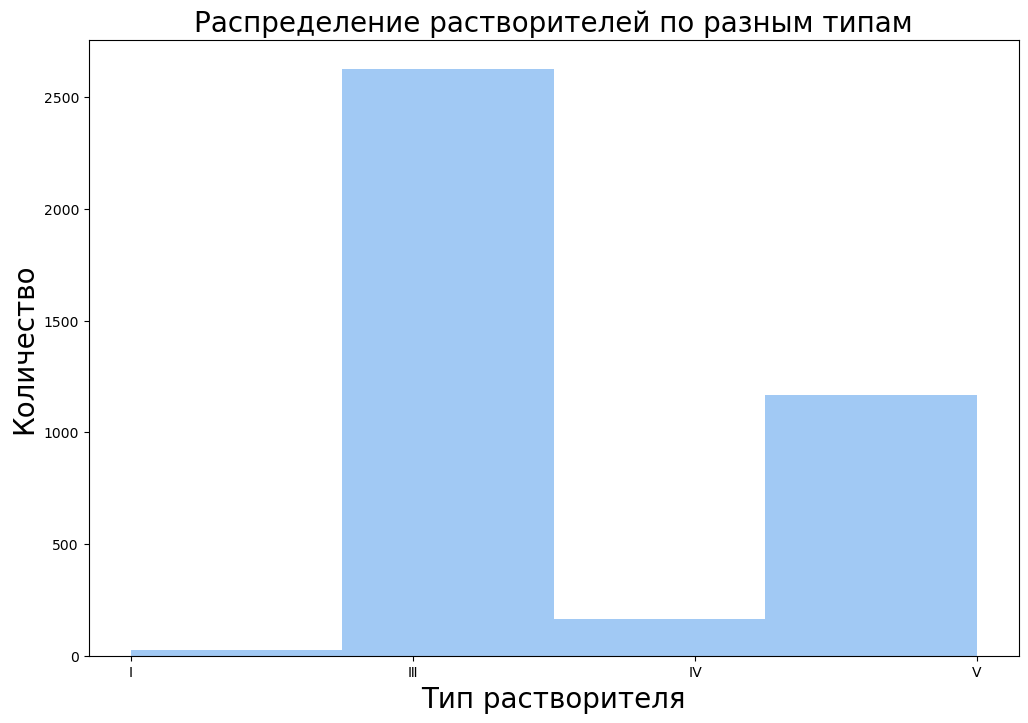

In [14]:
df_2 = dataset[dataset['Number of components'] == 2] #оставляем только 2-компонентные системы

fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
ax.hist(df_2['Type of DES'], bins = 4, color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Распределение растворителей по разным типам', fontsize = 20) # Создание заголовка
ax.set_xlabel('Тип растворителя', fontsize = 20) # Создание подписи оси х
ax.set_ylabel('Количество', fontsize = 20) # Создание подписи оси y
plt.show() #Вывод графика

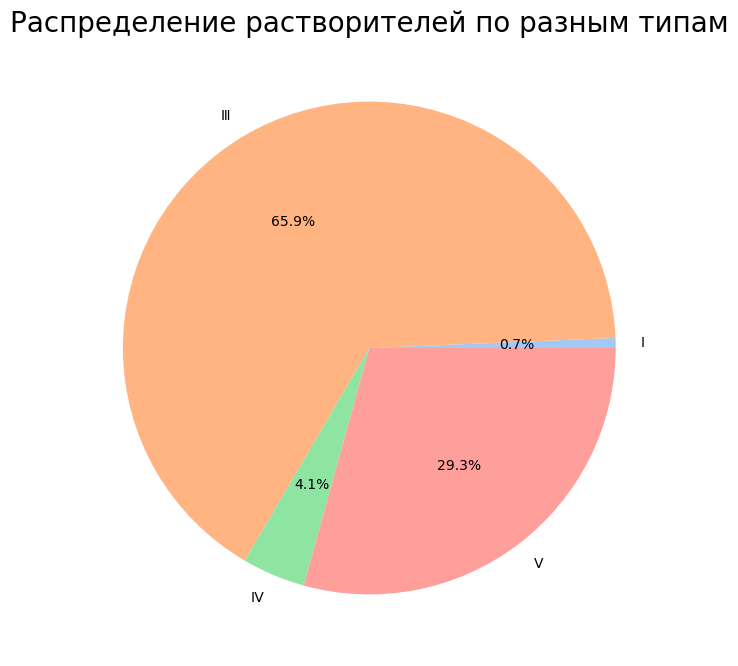

In [15]:
# Сначала создадим новую таблицу, в которой сгруппируем растворители по типу и найдем количество
df_2_type = pd.DataFrame(df_2.groupby('Type of DES')['Type of DES'].count())

# Построим круговую диаграмму
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
ax.pie(df_2_type['Type of DES'], labels = df_2_type.index, autopct = '%1.1f%%', colors = colors)
# Команда fontsize позволяет менять размер текста
ax.set_title('Распределение растворителей по разным типам', fontsize = 20) # Создание заголовка
plt.show() #Вывод графика

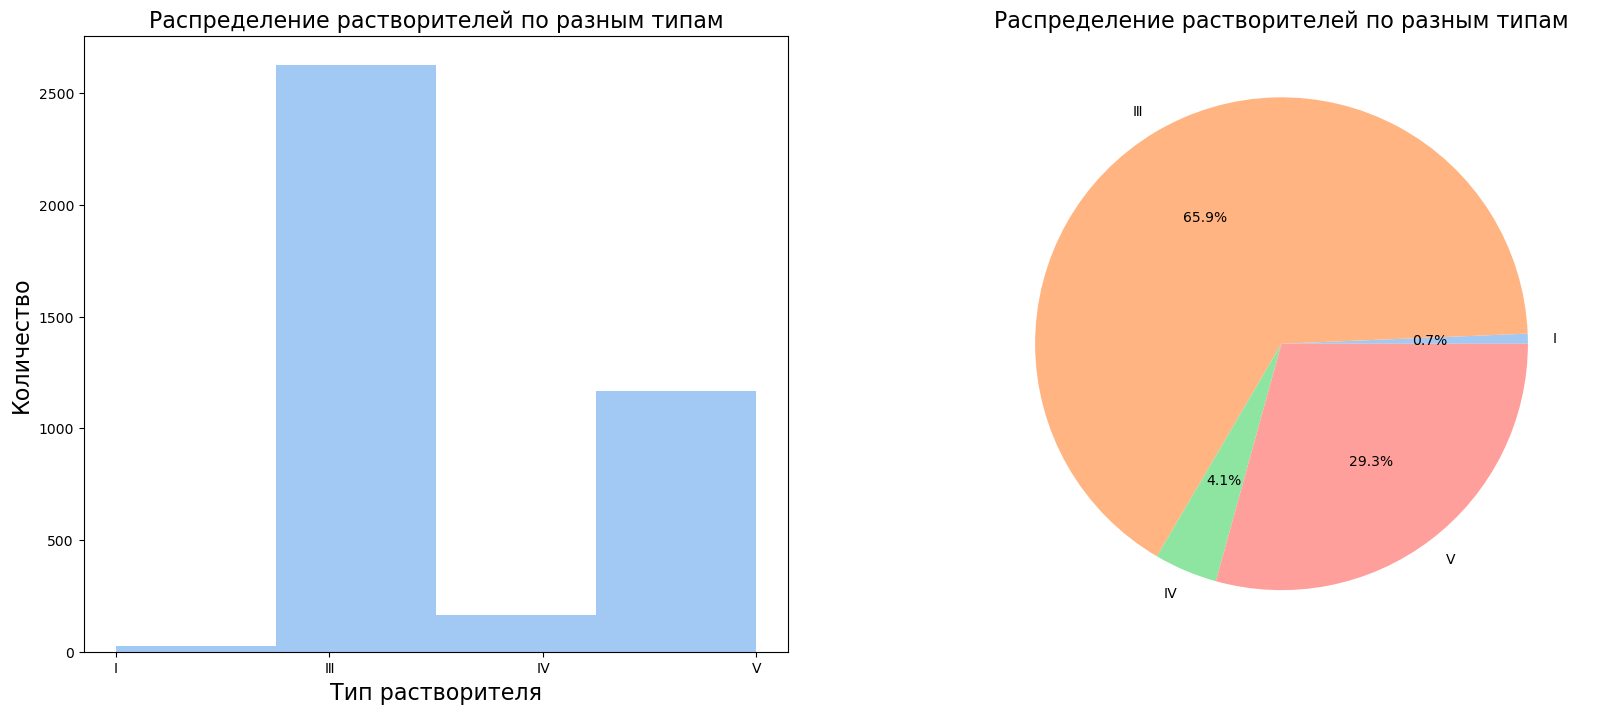

In [16]:
#Построим 2 графика на одном полотне
fig, ax = plt.subplots(figsize = (20,8), nrows = 1, ncols = 2) # Инициализация графиков и его размеров

#Столбчатая гистограмма
ax[0].hist(df_2['Type of DES'], bins = 4, color = colors[0])
ax[0].set_title('Распределение растворителей по разным типам', fontsize = 16) # Создание заголовка
ax[0].set_xlabel('Тип растворителя', fontsize = 16) # Создание подписи оси х
ax[0].set_ylabel('Количество', fontsize = 16) # Создание подписи оси y

#Круговая диаграмма
ax[1].pie(df_2_type['Type of DES'], labels = df_2_type.index, autopct = '%1.1f%%', colors = colors)
ax[1].set_title('Распределение растворителей по разным типам', fontsize = 16) # Создание заголовка

plt.show() #Вывод графика